In [2]:
library("xcms")

Lade nötiges Paket: BiocParallel

Lade nötiges Paket: MSnbase

Lade nötiges Paket: BiocGenerics

Lade nötiges Paket: parallel


Attache Paket: ‘BiocGenerics’


Die folgenden Objekte sind maskiert von ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


Die folgenden Objekte sind maskiert von ‘package:stats’:

    IQR, mad, sd, var, xtabs


Die folgenden Objekte sind maskiert von ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Lade nötiges Paket: Biobase

Welcome to Bioconductor

    Vign

In [20]:
## Reading the data like this you'll have MS1 and MS2 spectra
dda_data <- readMSData("/Users/mahnoorzulfiqar/OneDriveUNI/MZML/DS_201124_SC_full_PRM_pos_07.mzML", mode = "onDisk")

In [4]:
data 

MSn experiment data ("OnDiskMSnExp")
Object size in memory: 2.47 Mb
- - - Spectra data - - -
 MS level(s): 2 1 0 
 Number of spectra: 6653 
 MSn retention times: 0:00 - 13:01 minutes
- - - Processing information - - -
Data loaded [Wed Jan 26 11:12:47 2022] 
 MSnbase version: 2.17.7 
- - - Meta data  - - -
phenoData
  rowNames: DS_201124_SC_full_PRM_pos_07.mzML
  varLabels: sampleNames
  varMetadata: labelDescription
Loaded from:
  DS_201124_SC_full_PRM_pos_07.mzML 
protocolData: none
featureData
  featureNames: F1.S0001 F1.S0002 ... F1.S6653 (6653 total)
  fvarLabels: fileIdx spIdx ... spectrum (35 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'

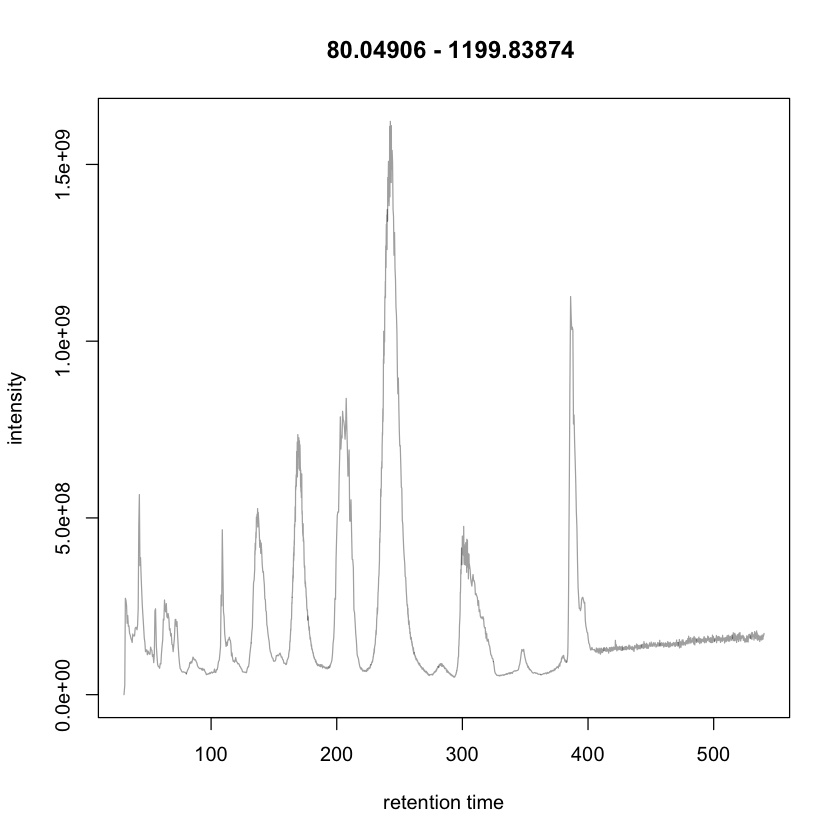

In [8]:
## Extract the MS1 EIC for whole file
plot(chromatogram(filterMsLevel(data, 1)))

In [22]:
library("Spectra")


Attache Paket: ‘Spectra’


Die folgenden Objekte sind maskiert von ‘package:xcms’:

    bin, estimatePrecursorIntensity, pickPeaks, ppm, spectrapply


Die folgenden Objekte sind maskiert von ‘package:MSnbase’:

    bin, combineSpectra, compareSpectra, pickPeaks, spectrapply




In [23]:
# input x is one mzML file
spec_Processing <- function(x){
    # read the spectra
    sps_all <- Spectra(x, backend = MsBackendMzR())
    #' Change backend to a MsBackendDataFrame: load data into memory
    sps_all <- setBackend(sps_all, MsBackendDataFrame())
    #' Filter Empty Spectra
    sps_all <- filterEmptySpectra(sps_all)
    #' Extract Precursor m/z(s) in each file
    pre_mz <- unique(precursorMz(sps_all))
    #' Remove any NAs
    pre_mz <- na.omit(pre_mz)
    spsall_pmz <- list(sps_all, pre_mz)
    return(spsall_pmz)
}

In [24]:
sps <- spec_Processing("/Users/mahnoorzulfiqar/OneDriveUNI/MZML/DS_201124_SC_full_PRM_pos_07.mzML")

In [27]:
premz <- sps[[2]]

In [29]:
mz = premz[67]

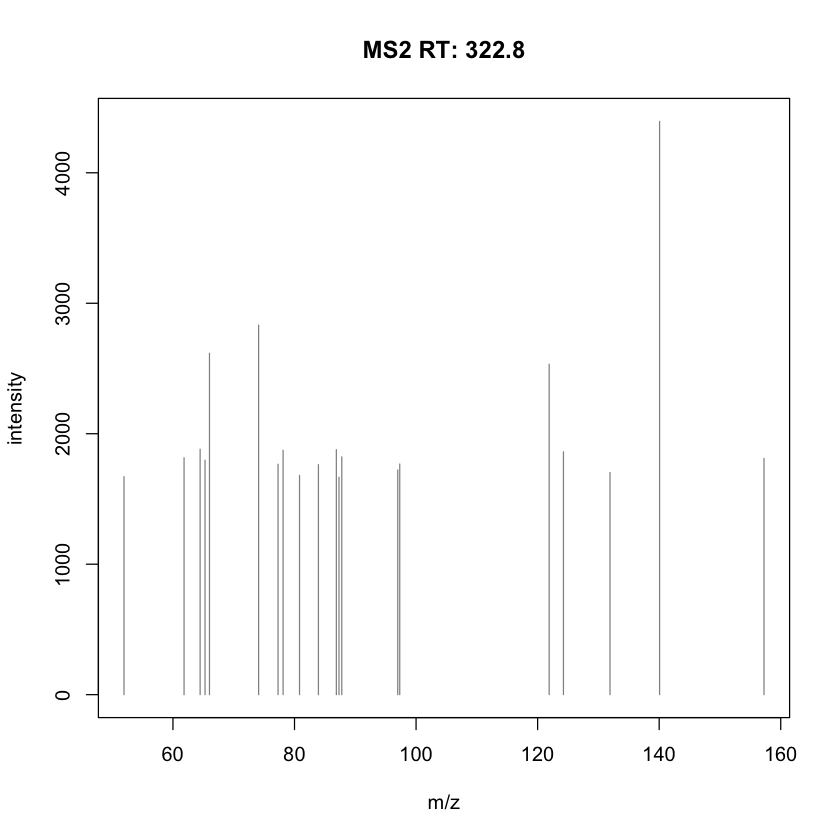

In [36]:
plotSpectra(filterPrecursorMz(sps[[1]], mz)[5])